In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

image1 = plt.imread('TNR.jpg')

plt.imshow(image1)

x, y, z = image1.shape

image1 = image1.reshape(x * y, z)

clust = KMeans(n_clusters = 3)

clust.fit(image1)

labels = clust.labels_

cent = clust.cluster_centers_

final = cent[labels]
final1 = cent[labels]
final2 = cent[labels]
final3 = cent[labels]

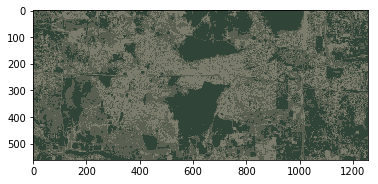

In [2]:
plt.imshow(final.astype(int).reshape(x, y, z))

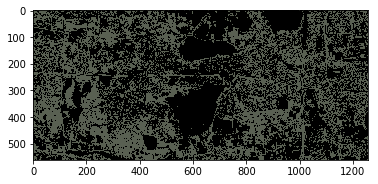

In [6]:
np.place(final1, final1 == cent[1], 0)
np.place(final1, final1 == cent[2], 0)
plt.imshow(final1.astype(int).reshape(x, y, z))

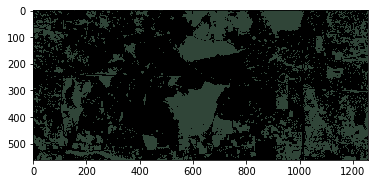

In [7]:
np.place(final2, final2 == cent[0], 0)
np.place(final2, final2 == cent[2], 0)
plt.imshow(final2.astype(int).reshape(x, y, z))

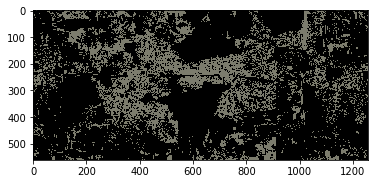

In [8]:
np.place(final3, final3 == cent[0], 0)
np.place(final3, final3 == cent[1], 0)
plt.imshow(np.int64(final3).reshape(x, y, z))

In [9]:
final1=final1.reshape(x*y*z,1)
final2=final2.reshape(x*y*z,1)
final3=final3.reshape(x*y*z,1)
print(final1.shape)
print(final2.shape)
print(final3.shape)

(2115531, 1)
(2115531, 1)
(2115531, 1)


In [11]:
c3=0
c1=0
c2=0

for i in final1:
    if i != 0:
        c1=c1+1
        
for j in final2:
    if j != 0:
        c2=c2+1
        
for k in final3:
    if k != 0:
        c3=c3+1
        
pc3= (c3/2115531)*100 
pc1= (c1/2115531)*100 
pc2= (c2/2115531)*100

print(pc1,pc2,pc3)

43.025368099073 31.769470643540558 25.205161257386443


In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [14]:
distortions=[]
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(image1)
    distortions.append(sum(np.min(cdist(image1, kmeanModel.cluster_centers_, 'euclidean'),axis=1))/image1.shape[0])

In [ ]:
plt.plot(K,distortions,'bx-')
plt.xlabel('image')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()